In [5]:
import numpy as np 
import matplotlib as plt 
import pandas as pd
from sklearn.utils import shuffle

# First Problem


## Decision Tree with Information Gain 
### Building The Tree 
As we know we can build a decision tree with multiple metrics. In this question we implement ID3 to build our desicion tree. ID3 uses information gain at each level to determine which feature splits the data best. Information gain is calculated with the help of entropy. Entropy finely describes how much a data is disordered, on the other hand, information gain shows the order of our data. In each level of building the tree we compute the information gain for remaining features and choose the feature with maximum information gain as our decision node. 
The equations for entropy and information gain is as below. 
$$ E = -Σ p_i log_2 p_i $$
$$ IG = E_{set} - Σ E_{subset} * p_{subset}$$


In [6]:
def compute_entropy (len_1, len_2,  len_3) :
  len_total = len_1 + len_2 + len_3
  param_one = len_1/len_total if len_1 else 1
  param_two = len_2/len_total if len_2 else 1
  param_three = len_3/len_total if len_3 else 1
  # Error handling : if a parameter is zero it will be ignored in calculation 
  #  since we set it's value to 1 in a log
  entropy =  - param_one * np.log2(param_one) - param_two* np.log2(param_two) - param_three * np.log2(param_three)
  return entropy
def compute_information_gain (source, sub) : 
  sub_entropy = []
  sub_entropy.append(compute_entropy(len(np.where(source[np.where(sub == 1 )[0]] == 1 )[0]), len(np.where(source[np.where(sub == 1 )[0]] == 0 )[0]), len(np.where(source[np.where(sub == 1 )[0]] == 2 )[0])))
  #  Get the entropy of the feature's subset 
  sub_entropy.append(len(np.where(sub == 1 )[0])/ len(source))
  #  Compute it's probability 
  sub_entropy.append(compute_entropy(len(np.where(source[np.where(sub == 0 )[0]] == 1 )[0]), len(np.where(source[np.where(sub == 0 )[0]] == 0 )[0]), len(np.where(source[np.where(sub == 0 )[0]] == 2 )[0])))
  sub_entropy.append(len(np.where(sub == 0 )[0])/ len(source))
  sub_entropy.append(compute_entropy(len(np.where(source[np.where(sub == 2 )[0]] == 1 )[0]), len(np.where(source[np.where(sub == 2 )[0]] == 0 )[0]), len(np.where(source[np.where(sub == 2 )[0]] == 2 )[0])))
  sub_entropy.append(len(np.where(sub == 2 )[0])/ len(source))
  sv_entropy = 0
  s_entropy = compute_entropy(len(np.where(source == 1 )[0]), len(np.where(source == 0 )[0]), len(np.where(source == 2 )[0]))
  for i in range(0, len(sub_entropy), 2) : 
    sv_entropy += sub_entropy[i]* sub_entropy[i+1]
  #  Each subset's entropy is multiplied with it's probability  
  information_gain = s_entropy - sv_entropy
  return information_gain
values = [np.array([1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1]), np.array([0, 0, 2, 1, 2, 1, 1, 0, 2, 0, 2, 1, 0, 1])]
values = np.concatenate((values,[np.array([0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0])]), axis  = 0 )
values = np.concatenate((values,[np.array([1, 0, 1, 1, 2, 0, 2, 1, 2, 1, 0, 1, 1, 2])]), axis  = 0 )
values = np.concatenate((values,[np.array([1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0])]), axis  = 0 )
#  Importing table's data 
headers = ["pressure", "cholesterol", "smoking", "weight"]
def build_tree (source_data, attributes, branch, depth, headers, parent): 
  max_depth = 3
  tree  = {}
  IGs = []
  IGs = [compute_information_gain(source_data, attributes[i]) for i in range(len(attributes))]
  # IGs is the information gain of all the remaining attributes 
  best_attribute = np.argmax(IGs)
  #  The best attribute's index
  tree ["name"] = headers[best_attribute]
  if (depth == max_depth or len(attributes) == 1 ): 
    n_label = [] 
    label = []
    for value in np.unique(source_data) : 
        n_label.append(np.count_nonzero(source_data == value))
        label.append(value)
    tree["lable"] =  label[np.argmax(n_label)]
    #  If the tree ends with this conditions the lable of the data 
    #  will be the majority's lable 
    return tree
    #  Our tree ends whether we have only one attribute left or we have 
    #  encountered the maximum depth 
    #  at this point, function returns the tree at hand
  else :
    if (IGs[best_attribute] == 0 ) : 
      tree["lable"] =  source_data[0]
      #  when the IG of the best attribute is 0 it means 
      #  all the values in that attribute are the same 
      #  so lable can be any of them. 
      if (branch != -1) : 
        tree["branch"] = branch
    else : 
      tree ["children"] = []
      for i in np.unique(attributes[best_attribute]) : 
        lables = []
        names = [name for name in headers if name != headers[best_attribute]]
        for j in np.where(attributes[best_attribute] == i)[0] :
          lables.append([ row[j] for row in np.delete(attributes, best_attribute, 0)])
        sub_tree = build_tree(source_data[np.where(attributes[best_attribute] == i )[0]], np.asarray(lables).T, i, depth+1, names, tree)
        if (branch == -1 or branch >= i  ): 
          tree["branch"] = i
        tree["children"].append(sub_tree)
        #  Each returned sub_tree will be a child of the tree we have 
  return tree

In [7]:
decision_tree = build_tree(values[4], np.delete(values, 4, 0), -1 , 0, headers, {})
print (decision_tree)

{'name': 'cholesterol', 'children': [{'name': 'pressure', 'children': [{'name': 'smoking', 'lable': 0, 'branch': 0}, {'name': 'smoking', 'lable': 1, 'branch': 1}], 'branch': 0}, {'name': 'smoking', 'children': [{'name': 'pressure', 'lable': 0, 'branch': 0}, {'name': 'pressure', 'lable': 1, 'branch': 1}], 'branch': 1}, {'name': 'pressure', 'lable': 1, 'branch': 2}], 'branch': 2}


### Prediction 
Now that we have build the tree with the train data, using it we can predict the labels of the test data. Each data according to the values of it's features goes through the tree and is assigned to the lable of the leaf it ends up to. 
With the description above, predicted labels and the final decision tree are as below.

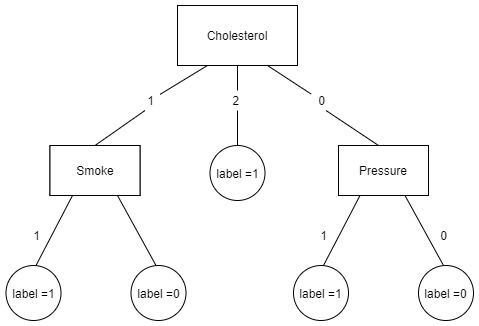

Predicted values $ :  15 \Rightarrow 1 , 16\Rightarrow 1, 17\Rightarrow 0, 18 \Rightarrow 1, 19 \Rightarrow 0 $ 

Lables $ :  15 \Rightarrow 1 , 16\Rightarrow 1, 17\Rightarrow 0, 18 \Rightarrow 0, 19 \Rightarrow 1 $
 $$ Precision  \Rightarrow T_p / (F_p + T_p)  = 2 / (1 + 2 ) = 66 \% $$ 
 $$ Recall \Rightarrow T_p / (T_p + F_n)  = 2 / (2+ 1 ) = 66 \% $$
 $$ Accuracy \Rightarrow (T_p + T_n )/ (T_p + T_n + F_p + F_n) = 3 / 5 = 60 \%$$
As we can see decision tree performs quite well considering that our train dataset is small. 
It's confusion matrix is as below. 
$$Confusion{Matrix} = \begin {bmatrix} 2, 1 \\  1, 1
\end {bmatrix}$$


## Increasing Resistance 
A decision tree continues to grow untill all the branches at last level are leaves, meaning the information gain of all the remaining features are zero. This can cause overfitting. Since overfitting happens when the model has lots of parameters, the more the decision tree grows the more it's possible to overfit. 

To avoid overfitting we can limit the tree's depth to some level, this means we stop the tree at some level.

When overfitting happens, the model performs well on the training data but lacks general aspects, meanin low performance on the test data. Another way to avoid this, is to use forests. Forests use different features and data and decide for the lable from majoritie's rule. This can also help with the generalization of our model. 

# Second Problem : 



## Decision Tree with ID3:

In [8]:
from sklearn import preprocessing
#  We can use the encoder from this library to encode the lables into numbers 
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [9]:
data = pd.read_csv("prison_dataset.csv")
headers = data.columns
data = data.to_numpy()
temp = data.T
lables = temp[len(temp)-1]
input = temp[0:len(temp)-1].T
lables, input = shuffle(lables, input)
#  How to transform lables to numerical values
encoder = preprocessing.LabelEncoder()
encoder.fit(input[:, 0])
X_temp = encoder.transform(input[:, 0])
encoder.fit(input[:, 1])
X = encoder.transform(input[:, 1])
values = [X_temp, X]
for i in range(2, len(input[0,  :])) :
  encoder.fit(input[:, i])
  X = encoder.transform(input[:, i])
  values = np.concatenate((values, [X]), axis= 0)
#  Split data into train and test subsets 
test_lables  = lables[0:int(len(lables)* 0.2)]
test_data = values[:, 0:int(len(lables)* 0.2)]
train_lables = lables[int(len(lables)* 0.2): len(lables)]
train_data = values[ :, int(len(lables)* 0.2): len(lables)]
headers = headers.to_numpy()
headers = headers[0: len(headers)-1]
#  Removing target header from the headers 

FileNotFoundError: ignored

In [ ]:
decision_tree = build_tree(train_lables, train_data, -1 , 0, headers, {})
decision_tree["name"]

In [ ]:
def predict (headers, test_data, decision_tree ) :
  predict_test = dict(zip(headers, test_data))
  tree = decision_tree 
  predicted_lables = []
  for j in range(len(test_data[0])):
    #  Navigating the tree for each data 
    tree = decision_tree
    depth = 0 
    while not ("lable" in tree.keys()) :
      #  We must follow the tree until the subset we are at has a lable attribute 
      tree = tree["children"][predict_test[tree["name"]][j]]
      #  Following of the treee happens by changing from parent to child 
      #   using the value of the test_data's attribute 
      #  Each test data has the same attributes as our tree 
      #   so at each level of the tree the next child will be the 
      #  branch value of the tree that is the same as the test_data's value for that attribute
      depth += 1
    predicted_lables.append(tree["lable"])
  predicted_lables = np.asarray(predicted_lables)
  return predicted_lables
def evaluate (predicted_lables, test_lables) :
  tp = np.dot(predicted_lables, test_lables)
  tn = np.dot(np.subtract(predicted_lables, 1), np.subtract(test_lables, 1)) 
  fn = np.dot(np.subtract(predicted_lables, 1), test_lables) * -1 
  fp = len(predicted_lables) - tp - tn - fn 
  conf_mat = [[tp, fp], [fn, tn]]
  print ("confusion matrix is :", conf_mat)
  print ("Accuracy is", (tp + tn) /(len(predicted_lables)))
  print ("Precision is ", tp/ (tp + fp))
  print ("Recall is ", tp/ (tp + fn))

## Decision tree with different maximum depths 
Predictions are made with different maximum depths for each tree. 
The results are as followed. 
maximum depth = 3 
$$ ConfusionMatrix = \begin {bmatrix} tp = 1106, tn = 1082 \\ fn = 637, fp = 259 \end {bmatrix}$$
$$ Accuracy \Rightarrow 0.709468 $$ 
$$ Precision \Rightarrow  0.810256 $$
$$ Recall \Rightarrow  0.634538152 $$
maximum depth = 4 
$$ ConfusionMatrix = \begin {bmatrix} tp = 1108, tn = 1101 \\ fn = 640, fp = 235 \end {bmatrix}$$
$$ Accuracy \Rightarrow 0.7162 $$
$$ Precision \Rightarrow  0.82501 $$ 
$$ Recall \Rightarrow 0.633867$$
maximum depth = 5 
$$ ConfusionMatrix = \begin {bmatrix} tp = 13523, tn = 879 \\ fn = 399, fp = 453 \end {bmatrix}$$
$$ Accuracy \Rightarrow  0.7237354$$ 
$$ Precision \Rightarrow  0.7491694$$ 
$$ Recall \Rightarrow  0.7722$$
maximum depth = 6 
$$ ConfusionMatrix = \begin {bmatrix} tp = 1259, tn = 977 \\ fn = 460, fp = 388 \end {bmatrix}$$
$$ Accuracy \Rightarrow 0.7250324 $$
$$ Precision \Rightarrow  0.76442 $$
$$ Recall \Rightarrow  0.73240255 $$
Generally when we have a larger maximum depth the accuracy increases, since more training is done on the data and more parameters are avaialble. As it's clear from the results precision and recall don't necessarily increase. 

In [ ]:
# Bootstraping data set : selecting random rows of data from the dataset but with replacement 
# meaning rows can be duplicates 
# k is the number of trees 
import random 
k = 4 
headers = np.asarray(headers)
predicted = []
for i in range(k):
  column = np.random.randint(len(train_data[0]), size=(len(train_data[0])))
  row = np.asarray(random.sample(range(10),  4))
  #  For each tree we only use 4 rows of the attributes of the whole dataset
  boot_data = []
  for i in range(4):
    boot_data.append(train_data[row[i]][column])
  decision_tree = build_tree(train_lables[column], np.asarray(boot_data), -1 , 0, headers[row], {})
  predicted.append(predict(headers, test_data, decision_tree))
#  Reshaping the predicted values to an array with k rows each for one of our trees
predicted = np.asarray(predicted).reshape(k, len(test_lables))
count_0 = np.count_nonzero(predicted == 0, axis=0)
count_1 = np.count_nonzero(predicted == 1, axis=0)
counts = np.asarray([count_0, count_1]).T
final_predicted = np.argmax(counts, axis = 1)
#  Each final lable is assigned by the majority rule 
evaluate(final_predicted, test_lables)

## Random Forests 
In comparison to the decision tree with the same maximum depth as our random forest, the random forest has a better performance, this we knew already but here the results are different. The reason why random forests generally perform better is that decision trees are highly sensitive to the data they are trained with, even if we have the same data but different sort of the data we may probably end up with different decision trees. This sensitivity reduces generalization of our model. When training a random forest we constantly change the structure of our training data, this can cause more generalization and reduce the sensitivity of this algorithm. The more our model is generalized the better it performs on the test data, but here the results are fairly the same. This is because of the data.The prison dataset's fiscal year release attribute has a high correlation with the traget arrtibute. Other attributes on the other hand have lower correlation with the target, in this case other attributes not really help on the decision we make and if both a tree and forest use this attribute in their decision making procedure, both will have a fairly correct lable for the test data. This is the main reason that both algorithms have approximately same results.

## Built-in Library Results 
  In comparison to the results from our own implementation, both are in the same range and may differ only in 0-5 percentage. 
  As stated above, they both have approximately same results. 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
classifier = RandomForestClassifier(max_depth=3, random_state=0)
classifier.fit(train_data.T, train_lables.astype(int))
predicted_lables = classifier.predict(test_data.T)

print(confusion_matrix(test_lables.astype(int), predicted_lables))
print(classification_report(test_lables.astype(int),predicted_lables))
print(accuracy_score(test_lables.astype(int), predicted_lables))

# Third Problem

## KNN 

In [ ]:
csvreader = pd.read_csv("wine.csv")
headers = csvreader.columns
lables = csvreader[headers[0]]
data = np.asarray(csvreader[headers[1:]])
lables, data = shuffle(lables, data)
test_lables  = lables[0:int(len(lables)* 0.2)]
test_data = data[0:int(len(lables)* 0.2), :]
train_lables = lables[int(len(lables)* 0.2): len(lables)]
train_data = data[int(len(lables)* 0.2): len(lables), :]

In [ ]:
def distance (data_1, data_2):
  x_1 = np.asarray(data_1)
  x_2 = np.asarray(data_2)
  dist = np.sqrt(np.dot(np.subtract(x_1, x_2), np.subtract(x_1, x_2)))
  #  Computing the euclidean distance of two data 
  return dist

def KNN (old_data, new_data, k, lables) :
  dist = []
  for i in range(len(old_data[:,0])):
    dist.append(distance(old_data[i,:], new_data))
  indx = np.argsort(dist)
  # Sorting the distances in descending order
  lables_tmp = lables[indx[0:k]]
  one_ = len(np.where(lables_tmp == 1)[0])
  two_ = len(np.where(lables_tmp == 2)[0])
  three_ = len(np.where(lables_tmp == 3)[0])
  final_lable = np.argmax([one_, two_, three_])+ 1
  #  Final lable will be the lable most common in the k 
  #   lables nearest to the test data
  return final_lable

def predict (train_data, test_data, train_lables, k) :
  y = []
  for i in range(len(test_data)) :
    y.append(KNN(train_data, test_data[i, :], k, train_lables))
  return y


def confusion_matrix (y_pred, y_test, lable, if_print) : 
  y_t = np.zeros(len(y_test), dtype = np.int8)
  y_t[np.where(y_test == lable)[0]] = 1
  y_p = np.zeros(len(y_test), dtype = np.int8)
  y_p[np.where(y_pred == lable)[0]] = 1
  precision = float('inf')
  recall = float('inf')
  tp = len(np.where(np.multiply(y_t, y_p) != 0 )[0])
  tn = len(np.where(np.multiply(np.subtract(y_t, 1), np.subtract(y_p, 1)) != 0 )[0])
  fn = len(np.where(np.multiply(np.subtract(y_p, 1), y_t) != 0)[0])
  fp = len(y_test) - tp - tn - fn 
  if ((tp + fp) != 0) :
    precision = tp / (tp+fp)
  if ((tp + fn) != 0) :
    recall = tp / (tp + fn)
  f1 = 2 * precision * recall / (precision + recall)
  accuracy = (tp + tn)/ len(y_test)
  if if_print   :
    print("fp", fp, "fn", fn, "tp", tp, "tn", tn)
  return precision, recall, accuracy, f1
y_pred = np.asarray(predict(train_data, test_data, train_lables.iloc[:].values, 5))
test_lable = np.asarray(test_lables.iloc[:].values)

In [ ]:
results = []
results.append(confusion_matrix(y_pred, test_lable, 1, True))
results.append(confusion_matrix(y_pred, test_lable, 2, True))
results.append(confusion_matrix(y_pred, test_lable, 3, True))

print("result for class 1 :", "precision:", results[0][0], "recall:", results[0][1], "accuracy:", results[0][2], "f1:", results[0][3])
print("result for class 2 :", "precision:", results[1][0], "recall:", results[1][1], "accuracy:", results[1][2], "f1:", results[1][3])
print("result for class 3 :", "precision:", results[2][0], "recall:", results[2][1], "accuracy:", results[2][2], "f1:", results[2][3])

In [ ]:
def find_opt_k () :
  #  computing accuracy for a range of neigbors to find the best value 
  test_lable = np.asarray(test_lables.iloc[:].values)
  accuracy_1 = []
  accuracy_2 = []
  accuracy_3 = []
  for i in range(0, 20, 2) : 
    y_pred = (np.asarray(predict(train_data, test_data, train_lables.iloc[:].values, i+1)))
    accuracy_1.append(confusion_matrix(y_pred, test_lable, 1, False)[2] *100)
    accuracy_2.append(confusion_matrix(y_pred, test_lable, 2, False)[2] *100)
    accuracy_3.append(confusion_matrix(y_pred, test_lable, 3, False)[2] *100)
  plt.pyplot.plot(range(0, 20,2), accuracy_1)
  plt.pyplot.plot(range(0, 20,2), accuracy_2)
  plt.pyplot.plot(range(0, 20,2), accuracy_3)
find_opt_k()

As we can see in the plot above, 9 can be a good value for the number of neighbors.

In [ ]:
!pip install metric_learn

## LMNN 

### Description 
Large margin nearest neighberhood, is another metric learning algorithm used for KNN classification. It's main difference is how it measures distance. This algorithm uses Mahalanobis method for computing distance. Mahalabonis is a way of measuring what distance point P has from a distribution. In another way how many standard deviations is P away from the mean of D. In LMNN, mahalabonis is used to save K nearest neighbors form test lable x which have the same lable as x and save other neighbors with different lables by a margin. In this algorithm, the following equation is optimized to find the best condition ( where k nearest lables with same lable as x and others with a margin are saved ). 
$$ min_L∑_{i, j} η_{i,j}||L(x_i−x_j)||^2+c∑_{i,j,l} η_{ij}(1−y_{ij})[1+||L(x_i−x_j)||^2−||L(x_i−x_l)||^2])$$
$$ x_i \Rightarrow DataPoint $$
$$ x_j \Rightarrow KNearestNeighbor $$
$$ x_l \Rightarrow LargeMarginNeighbors $$
$$ η_{i,j} , y_{i,j} 𝜖 \{0,1\} $$
If $y_{i,j} = 0$ then $x_i, x_j$ belong to different classes. 

In [ ]:
from metric_learn import LMNN
from sklearn.neighbors import KNeighborsClassifier
k_test = 5 
lmnn = LMNN(k=5, learn_rate=1e-6,  random_state= 0)
lmnn.fit(train_data, train_lables)
knn = KNeighborsClassifier(metric = lmnn.get_metric())
knn.fit(train_data, train_lables)
predicted_lib = knn.predict(test_data)
results = []
results.append(confusion_matrix(predicted_lib, test_lable, 1, True))
results.append(confusion_matrix(predicted_lib, test_lable, 2, True))
results.append(confusion_matrix(predicted_lib, test_lable, 3, True))

print("result for class 1 :", "precision:", results[0][0], "recall:", results[0][1], "accuracy:", results[0][2], "f1:", results[0][3])
print("result for class 2 :", "precision:", results[1][0], "recall:", results[1][1], "accuracy:", results[1][2], "f1:", results[1][3])
print("result for class 3 :", "precision:", results[2][0], "recall:", results[2][1], "accuracy:", results[2][2], "f1:", results[2][3])

In [ ]:
test_lable = np.asarray(test_lables.iloc[:].values)
accuracy_1 = []
accuracy_2 = []
accuracy_3 = []
for k in range(1, 20, 2) : 
  knn = KNeighborsClassifier(n_neighbors = k )
  knn.fit(lmnn.transform(train_data), train_lables)
  predicted_lib = knn.predict(test_data)
  accuracy_1.append(confusion_matrix(predicted_lib, test_lable, 1, False)[2] *100)
  accuracy_2.append(confusion_matrix(predicted_lib, test_lable, 2, False)[2] *100)
  accuracy_3.append(confusion_matrix(predicted_lib, test_lable, 3, False)[2] *100)
plt.pyplot.plot(range(1, 20,2), accuracy_1)
plt.pyplot.plot(range(1, 20,2), accuracy_2)
plt.pyplot.plot(range(1, 20,2), accuracy_3)

## Finding Best Number Of Neighbors
As it can be deduced from the plot, eventually all lables converge to a maximum value after some number of k. We can check this number for each lable and when the last lable converges the maximum k can be chosen as the best number of neighbors to use. 

## MLKR

In [ ]:
from metric_learn import MLKR
from sklearn.neighbors import KNeighborsClassifier
k_test = 5 
mlkr = MLKR()
mlkr.fit(train_data, train_lables)
knn = KNeighborsClassifier(metric = mlkr.get_metric(), n_neighbors= k_test)
knn.fit(train_data, train_lables)
predicted_lib = knn.predict(test_data)
results = []
results.append(confusion_matrix(predicted_lib, test_lable, 1, True))
results.append(confusion_matrix(predicted_lib, test_lable, 2, True))
results.append(confusion_matrix(predicted_lib, test_lable, 3, True))

print("result for class 1 :", "precision:", results[0][0], "recall:", results[0][1], "accuracy:", results[0][2], "f1:", results[0][3])
print("result for class 2 :", "precision:", results[1][0], "recall:", results[1][1], "accuracy:", results[1][2], "f1:", results[1][3])
print("result for class 3 :", "precision:", results[2][0], "recall:", results[2][1], "accuracy:", results[2][2], "f1:", results[2][3])